In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [82]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [83]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "LuasTanah", "Luas Bangunan (m2)": "LuasBangunan", "Harga Penawaran (dari Owner)": "HargaPenawaran", "Lebar Jalan Depan Rumah (ROW)": "LebarJalan"})
df.head()

,Area Category,Nama Daerah,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,LebarJalan
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [84]:
# describe data
df.describe()

,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [85]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area Category       308 non-null    object
 1   Nama Daerah         308 non-null    object
 2   LuasTanah           308 non-null    int64 
 3   LuasBangunan        308 non-null    int64 
 4   Jumlah Kamar        308 non-null    int64 
 5   Jumlah Kamar Mandi  308 non-null    int64 
 6   Tingkat/Lantai      308 non-null    int64 
 7   HargaPenawaran      308 non-null    int64 
 8   Terjual/Belum       308 non-null    object
 9   Arah Hadap Rumah    308 non-null    object
 10  Posisi Rumah        308 non-null    object
 11  LebarJalan          308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [86]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [87]:
# drop Terjual/Belum karena isinya belum semua
df = df.drop(['Nama Daerah', 'Terjual/Belum'], axis=1)

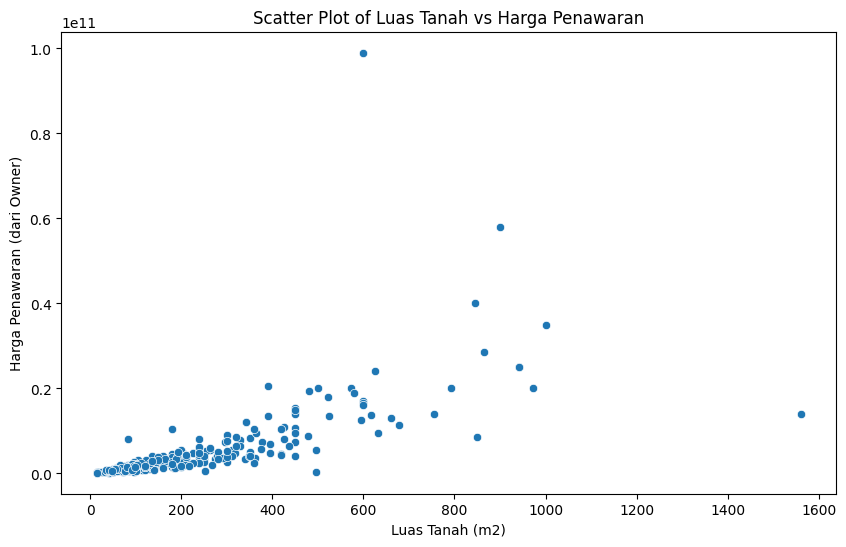

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LuasTanah', y='HargaPenawaran')
plt.title('Scatter Plot of Luas Tanah vs Harga Penawaran')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.show()

The plot shows a general trend where properties with larger 'Luas Tanah' tend to have higher 'Harga Penawaran'. This suggests a positive correlation between the size of the land and the asking price. However, there is also a significant spread in 'Harga Penawaran' for properties with similar 'Luas Tanah', especially at the lower end of the 'Luas Tanah' scale. This indicates that other factors besides land size are also influencing the price of the property. There are also some outliers with very large 'Luas Tanah' and relatively lower 'Harga Penawaran', or vice versa, which might be worth investigating further.

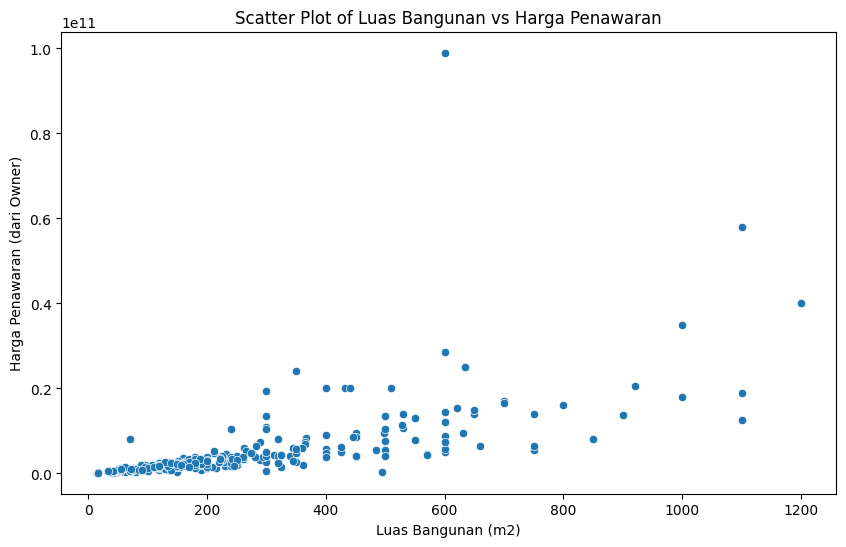

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LuasBangunan', y='HargaPenawaran')
plt.title('Scatter Plot of Luas Bangunan vs Harga Penawaran')
plt.xlabel('Luas Bangunan (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.show()

This scatter plot of 'Luas Bangunan' vs 'Harga Penawaran' also shows a general positive trend, indicating that properties with larger building areas tend to have higher asking prices. However, there is still a noticeable spread, suggesting that building area is also not the only factor influencing the price. There are instances of properties with similar building sizes having different prices, and vice versa. This further reinforces the idea that a combination of factors determines the final offer price.

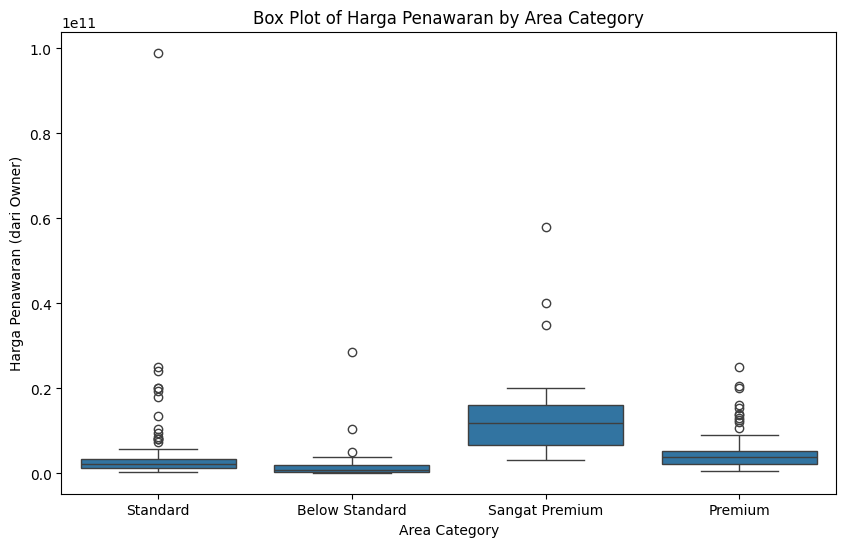

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Area Category', y='HargaPenawaran')
plt.title('Box Plot of Harga Penawaran by Area Category')
plt.xlabel('Area Category')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.show()

The box plot clearly shows a relationship between 'Area Category' and 'Harga Penawaran'. Properties in categories like 'Sangat Premium' and 'Premium' generally have significantly higher median prices and wider ranges of prices compared to 'Standard' and 'Below Standard' areas. The 'Below Standard' category has the lowest median price and the smallest spread. This indicates that the area category is a strong indicator of property price, with properties in more premium areas commanding higher prices. The presence of outliers in the higher categories suggests that some properties in these areas have exceptionally high asking prices.



## Data Transformation

In [91]:
# # Encoding Area Category
# le = LabelEncoder()
# df['Area Category'] = le.fit_transform(df['Area Category'])
# df.head()

In [93]:
# Duplicate the dataframe for encoding
df_encoded = df.copy()

# Ordinal Encoding with mapping
area_category_map = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
lebar_jalan_map = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}

df_encoded['Area Category'] = df_encoded['Area Category'].map(area_category_map)
df_encoded['LebarJalan'] = df_encoded['LebarJalan'].map(lebar_jalan_map)

# One-Hot Encoding
one_hot_cols = ['Arah Hadap Rumah', 'Posisi Rumah']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

display(df_encoded.head())

,Area Category,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran,LebarJalan,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate
0,1,240,300,4,3,2,3500000000,1,False,False,True,False,True,False,False
1,0,30,60,2,1,2,287799000,0,False,False,True,False,True,False,False
2,1,170,170,5,4,2,2699999999,1,True,False,False,False,False,False,False
3,3,187,250,5,5,2,3100000000,1,False,False,True,False,True,False,False
4,2,350,600,5,5,2,5000000000,1,False,False,False,False,True,False,False


In [94]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df_encoded.copy()

# Columns to scale
numerical_cols = ['LuasTanah', 'LuasBangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'HargaPenawaran']

# Fit and transform the selected columns
df_scaled[numerical_cols] = sc.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

,Area Category,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran,LebarJalan,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate
0,1,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,1,False,False,True,False,True,False,False
1,0,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0,False,False,True,False,True,False,False
2,1,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,1,True,False,False,False,False,False,False
3,3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,1,False,False,True,False,True,False,False
4,2,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,1,False,False,False,False,True,False,False


In [95]:
# get stastical information on the new dataset
df_scaled.describe()

,Area Category,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran,LebarJalan
count,308.000000,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000
mean,1.396104,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,1.331169
std,0.802430,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,0.553993
min,0.000000,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000
25%,1.000000,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,1.000000
50%,1.000000,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,1.000000
75%,2.000000,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,2.000000
max,3.000000,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,2.000000


## Silhouette Score

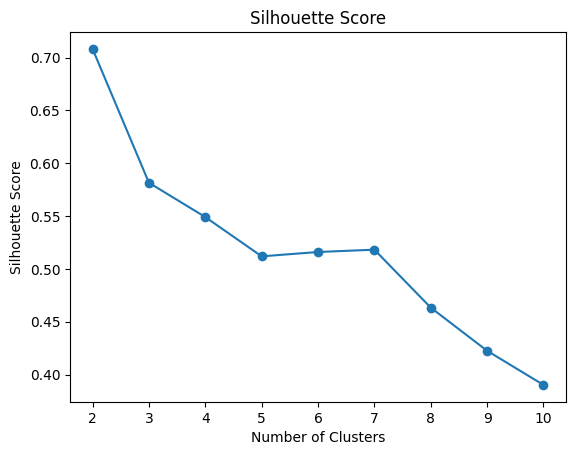

In [96]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

The plot shows how the silhouette score changes as the number of clusters increases from 2 to 10. The silhouette score is highest when the number of clusters is 2. After 2 clusters, the silhouette score generally decreases.

This suggests that, using the Agglomerative Clustering model with 'single' linkage, 2 clusters appear to be the most well-defined and separated among the range of clusters tested. A silhouette score of around 0.7 indicates that the data points are relatively well-clustered.

Therefore, based on the silhouette analysis with 'single' linkage, the optimal number of clusters for this dataset seems to be 2.

Skipping Ward linkage with Manhattan metric (not supported).


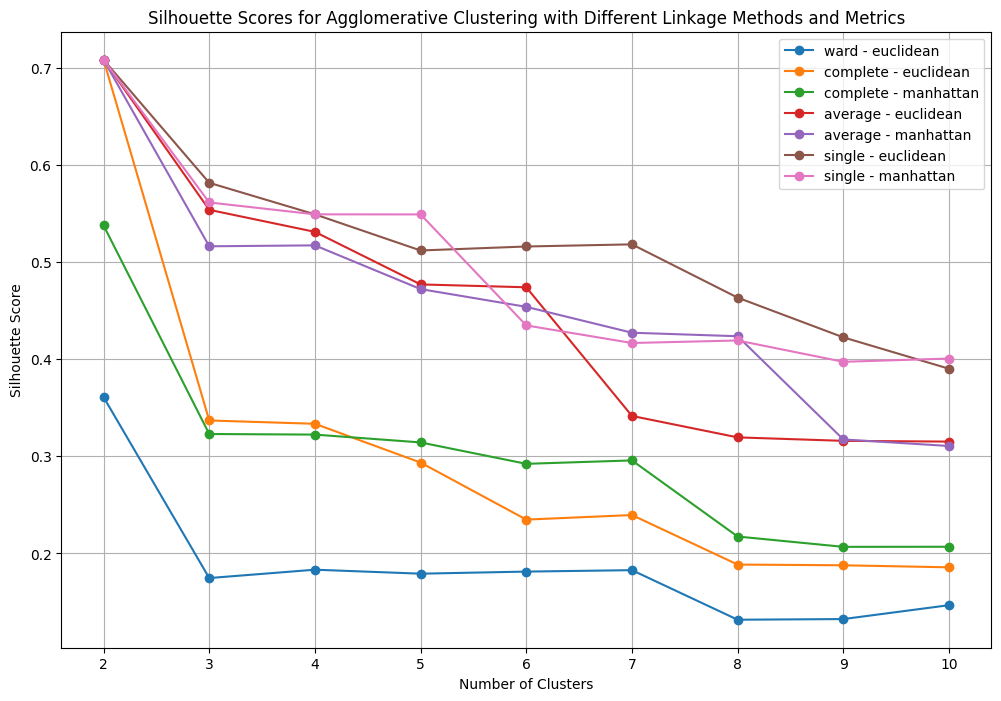

Best Silhouette Score: 0.7082503608949028
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [97]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

The highest silhouette score achieved is approximately 0.708. This score was obtained with 2 clusters, using the 'complete' linkage method and the 'euclidean' distance metric.

This finding reinforces the previous observation from the 'single' linkage silhouette plot, suggesting that 2 clusters provide the best separation and definition among the tested configurations. The 'complete' linkage and 'euclidean' metric appear to be the most effective combination for revealing this structure in the scaled data, resulting in a relatively high silhouette score.

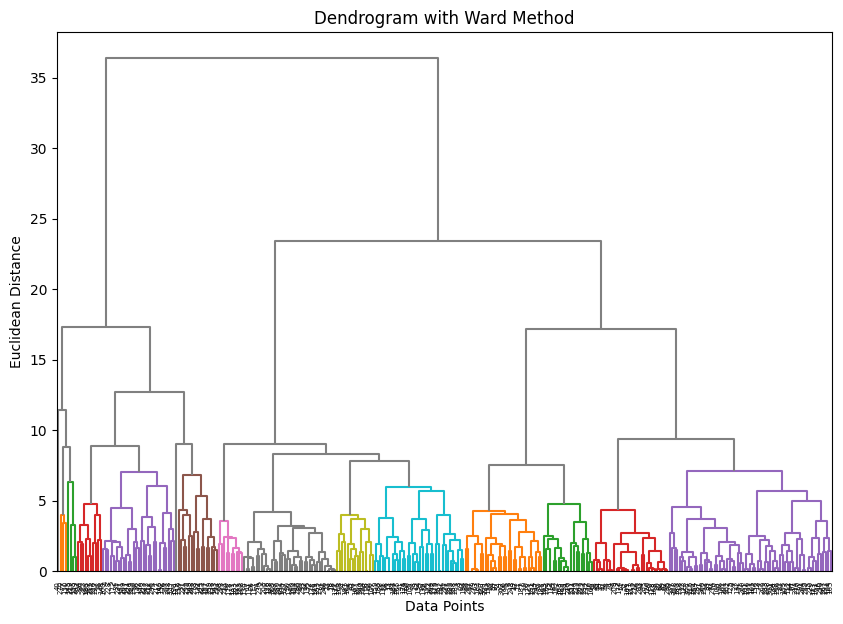

In [98]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

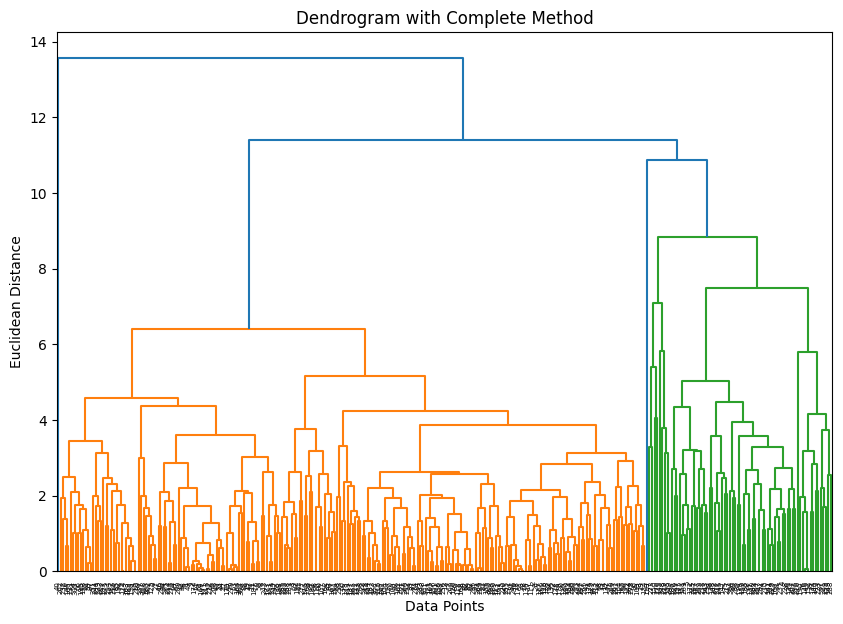

In [99]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

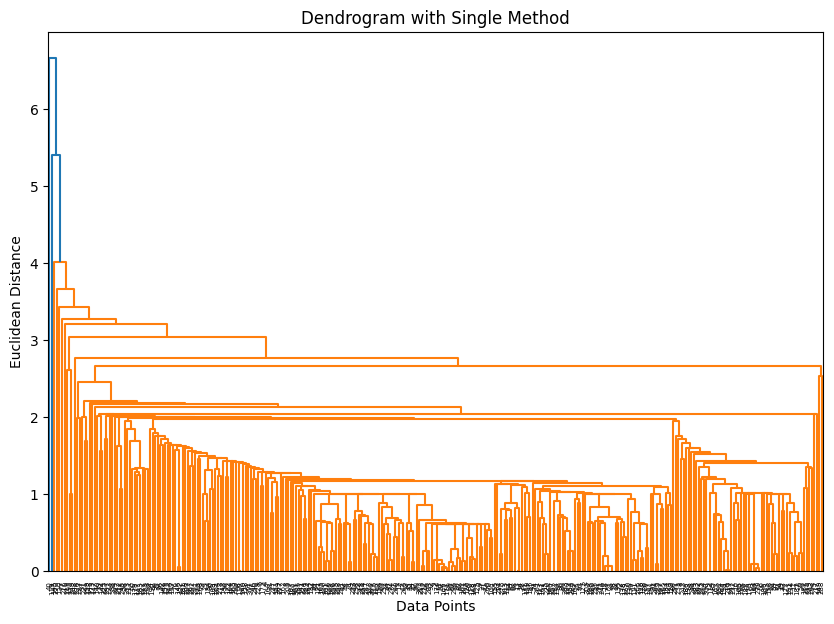

In [100]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

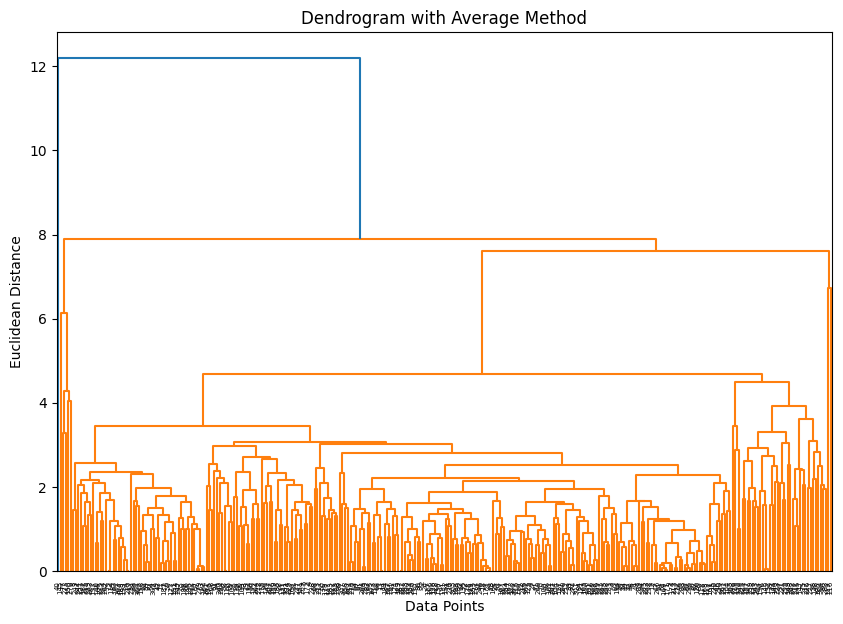

In [101]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [118]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [108]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print("Complete Eucledian Score: ", ss)

Complete Eucledian Score:  0.7082503608949028


## Dendogram Visualization for Hierarchical Clustering Model

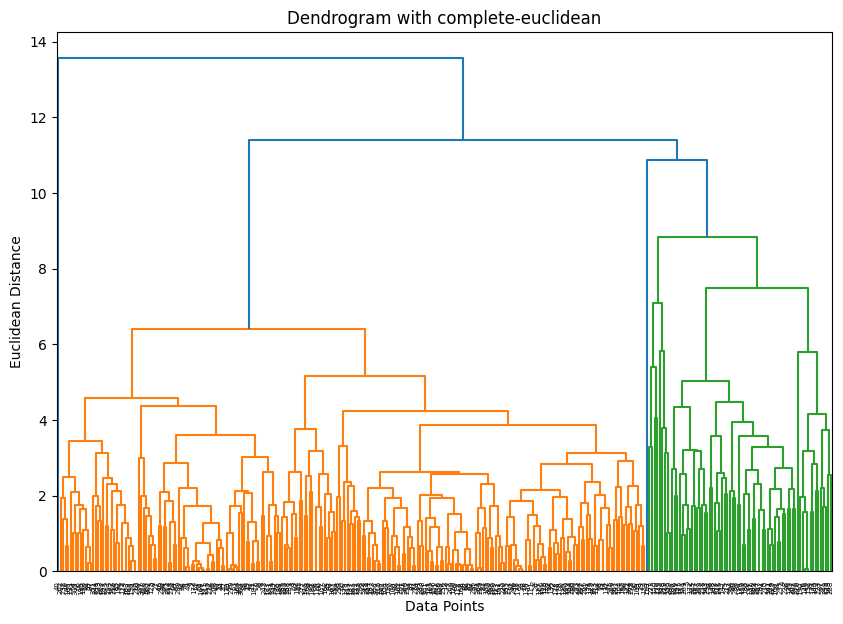

In [104]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

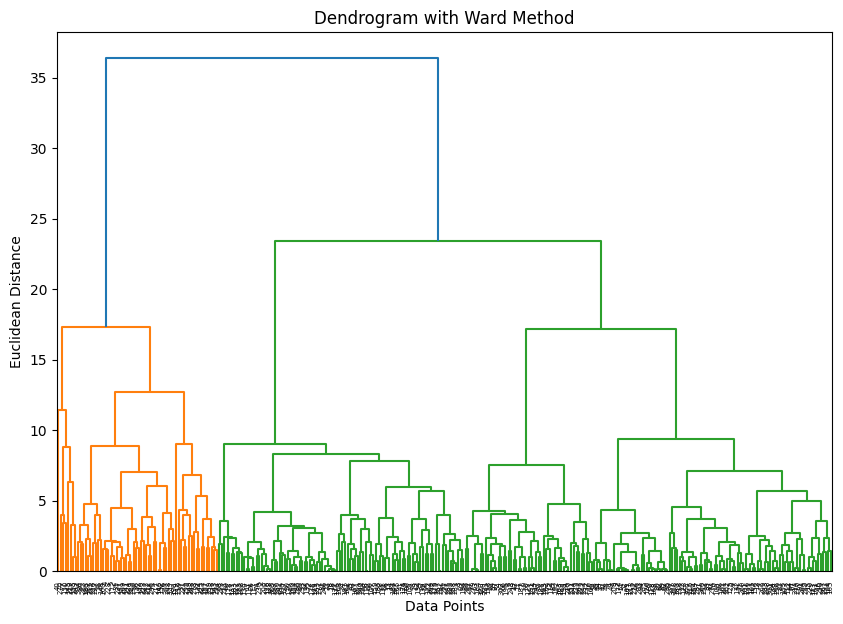

In [119]:
# Ward Method
linked_ward = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_ward)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [105]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,LuasTanah,LuasBangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,HargaPenawaran,Arah Hadap Rumah,Posisi Rumah,LebarJalan,Agglo
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


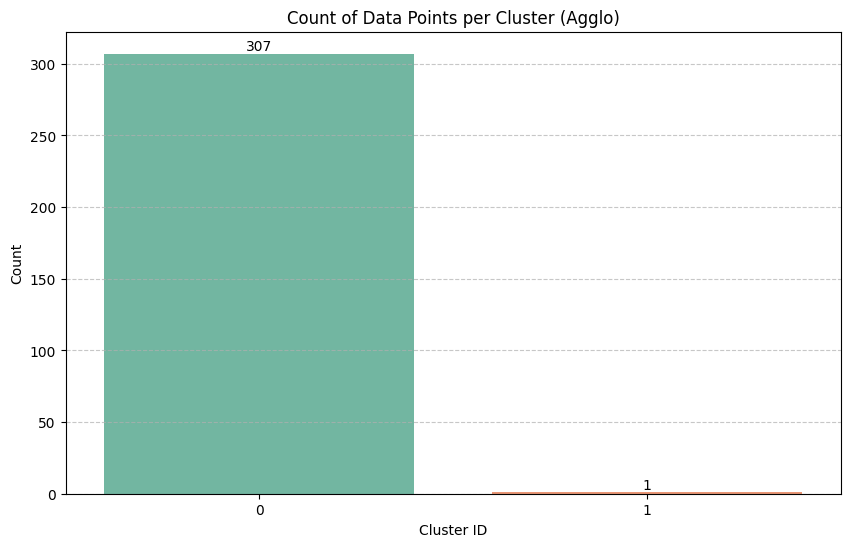

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot clearly shows a highly imbalanced distribution of data points between the two clusters identified by the Agglomerative Clustering model.
*   Cluster 0 contains the vast majority of the data points, with a count of 307.
*   Cluster 1 contains only a single data point.

This indicates that the clustering resulted in one very large cluster and one tiny cluster (essentially an outlier). While the silhouette score suggested 2 clusters were optimal in terms of separation, this distribution suggests that one cluster captures the main body of the data, and the other might represent an anomaly or a very distinct data point.

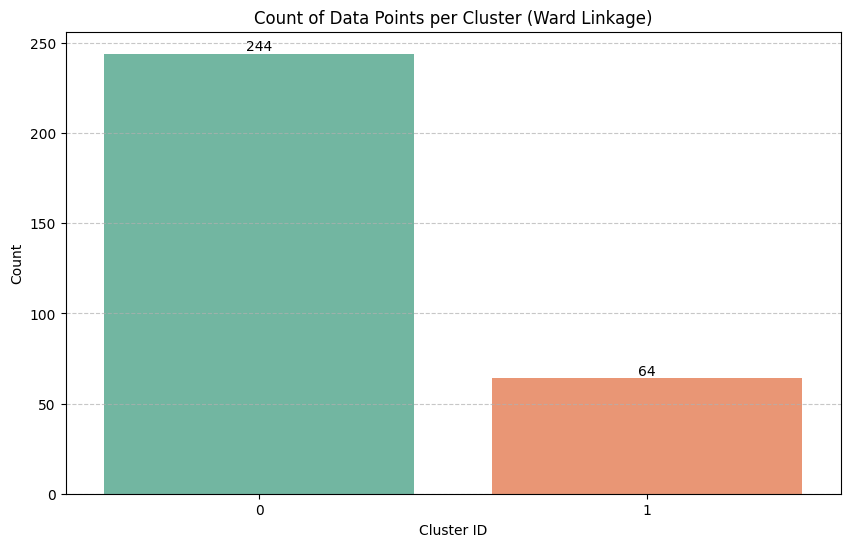

In [120]:
# Get the counts of each cluster in the Ward linkage model
cluster_counts_ward = pd.Series(y_hc_ward).value_counts().sort_index()

# Create a bar plot for Ward linkage clusters
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_ward.index, y=cluster_counts_ward.values, hue=cluster_counts_ward.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Ward Linkage)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Unlike the complete linkage model which resulted in a highly imbalanced distribution (one large cluster and one tiny cluster), the Ward linkage model with 2 clusters shows a more balanced distribution of data points.

Cluster 0 contains 244 data points.
Cluster 1 contains 64 data points.
While still not perfectly even, this distribution is significantly more balanced than the complete linkage result. This suggests that the Ward linkage method, which aims to minimize the variance within clusters, found a different structure in the data that results in more equally sized groups compared to the complete linkage method. This might be a more desirable clustering result depending on the goals of the analysis.

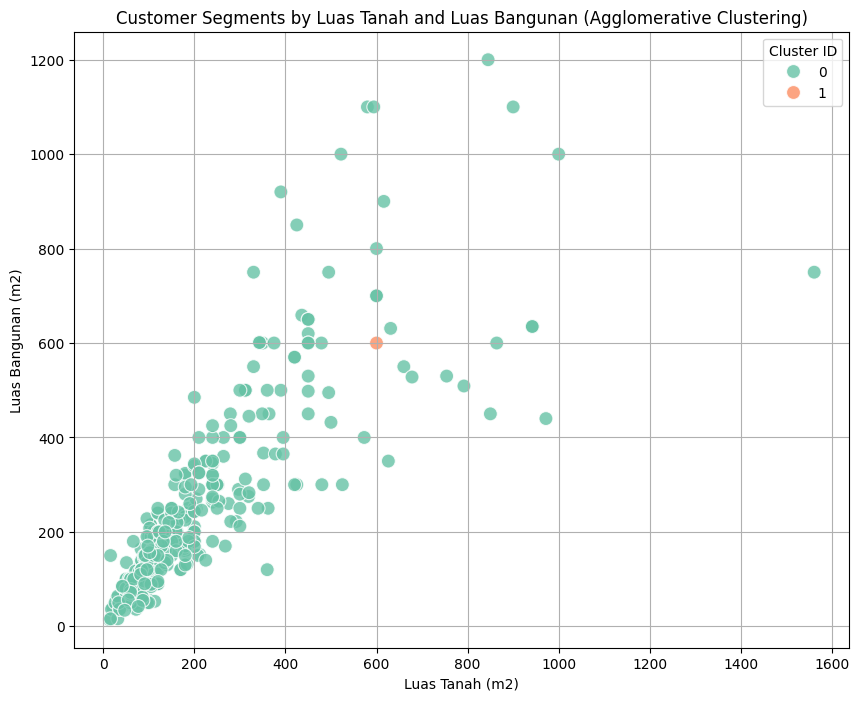

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='LuasTanah', y='LuasBangunan', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Tanah and Luas Bangunan (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Luas Bangunan (m2)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [115]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'LuasTanah'
y_col = 'LuasBangunan'
z_col = 'HargaPenawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Statistical Summary for each cluster

In [116]:
# Group the data by cluster and calculate the mean, std, min, max for numerical columns
# and the first value (mode) and count for 'Area Category'
cluster_summary = df.groupby(y_hc).agg({
    'Area Category': ['first', 'count'],
    'LuasTanah': ['mean', 'std', 'min', 'max'],
    'LuasBangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'HargaPenawaran': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Area Category MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Area Category         LuasTanah                        LuasBangunan  \
                 mode count        mean         std  min   max         mean   
cluster                                                                       
0            Standard   307  225.736156  201.019246   14  1561   265.602606   
1            Standard     1  600.000000         NaN  600   600   600.000000   

                                ... Jumlah Kamar Mandi     Tingkat/Lantai   \
                std  min   max  ...                min max            mean   
cluster                         ...                                          
0        212.655015   14  1200  ...                  1  13        1.843648   
1               NaN  600   600  ...                  5   5        1.000000   

                          HargaPenawaran                             \
              std min max           mean           std          min   
cluster                                                               
0        0.506478   1   4   4.708159e+09  6.351742e+09    160000000   
1             NaN   1   1   9.900000e+10           NaN  99000000000   

                      
                 max  
cluster               
0        58000000000  
1        99000000000  

[2 rows x 26 columns]

Cluster 0: This cluster represents the large majority of the properties. The mean 'LuasTanah' is around 225 m², 'LuasBangunan' is around 265 m², and the mean 'HargaPenawaran' is around 4.7 billion. The ranges (min/max) for these features are quite broad, reflecting the diversity within this large cluster. The mode 'Area Category' is 'Standard'.
Cluster 1: This cluster contains a single data point. This property has a 'LuasTanah' of 600 m², 'LuasBangunan' of 600 m², and a very high 'HargaPenawaran' of 99 billion. Its 'Area Category' is 'Standard', although the price and sizes are significantly higher than the typical 'Standard' property in Cluster 0.
This summary confirms that the complete linkage method with 2 clusters separated a single, very high-priced and large property as an outlier (Cluster 1) from the rest of the dataset (Cluster 0).

In [121]:
# Group the data by cluster (Ward linkage) and calculate summary statistics
cluster_summary_ward = df.groupby(y_hc_ward).agg({
    'Area Category': ['first', 'count'],
    'LuasTanah': ['mean', 'std', 'min', 'max'],
    'LuasBangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
    'HargaPenawaran': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Area Category MultiIndex level
cluster_summary_ward = cluster_summary_ward.rename(columns={'first': 'mode'}, level=1)

cluster_summary_ward = cluster_summary_ward.rename_axis('cluster')

display(cluster_summary_ward)

Area Category         LuasTanah                        LuasBangunan  \
                 mode count        mean         std  min   max         mean   
cluster                                                                       
0            Standard   244  148.561475   84.584000   14   495   182.823770   
1             Premium    64  525.812500  237.394446  240  1561   586.421875   

                                ... Jumlah Kamar Mandi     Tingkat/Lantai   \
                std  min   max  ...                min max            mean   
cluster                         ...                                          
0        102.004588   14   570  ...                  1   7        1.831967   
1        224.040515  170  1200  ...                  2  13        1.875000   

                          HargaPenawaran                            \
              std min max           mean           std         min   
cluster                                                              
0        0.471887   1   3   2.479708e+09  1.770719e+09   160000000   
1        0.629941   1   4   1.467744e+10  1.431064e+10  2000000000   

                      
                 max  
cluster               
0        10500000000  
1        99000000000  

[2 rows x 26 columns]

Cluster 0: This is the larger cluster. Properties in this cluster have a lower mean 'LuasTanah' (around 148 m²), 'LuasBangunan' (around 182 m²), and 'HargaPenawaran' (around 2.4 billion) compared to Cluster 1. The mode 'Area Category' is 'Standard'. The ranges for these features are narrower than in the large cluster from the complete linkage model.
Cluster 1: This is the smaller cluster. Properties here have significantly higher mean 'LuasTanah' (around 525 m²), 'LuasBangunan' (around 586 m²), and 'HargaPenawaran' (around 14.6 billion). The mode 'Area Category' is 'Premium'. This cluster contains larger and more expensive properties, including the outlier property with the 99 billion price.
The Ward linkage method appears to have grouped properties based on a combination of size, price, and potentially area category, resulting in one cluster of generally smaller, less expensive properties (Cluster 0, mostly 'Standard' area) and another cluster of larger, more expensive properties (Cluster 1, mostly 'Premium' area), providing a more meaningful segmentation than the complete linkage method which isolated a single outlier.

Cluster 0 (n=307) — Mid-Range Residential Homes, Mainstream Market Segment

Profile:

Area Category: Standard

Average Land Size: ~226 m² (range: 14–1561 m²)

Average Building Size: ~266 m²

Floors: Mostly 2 floors (avg. 1.8)

Average Price: ~Rp 4.7B (range: Rp 160M – Rp 58B)

Meaning:
This cluster represents the core middle-to-upper housing segment in Surabaya’s property market. Properties are mostly located in established residential areas (Citraland, Mulyosari, Gubeng, etc.), offering balanced land–building ratios suitable for families. Price variation is wide but centered around the mid-premium range.

Strategy:

Focus on affordable financing options (KPR/mortgage packages, flexible installments).

Use virtual tours and pricing simulators to enhance decision-making.

Emphasize investment value (safe area, solid infrastructure, long-term appreciation).

Promote through digital channels — Instagram, property marketplaces, and targeted ads.

Key KPIs:
Lead conversion rate, average selling price, average days on market.

Cluster 1 (n=1) — Ultra-Premium Outlier Property

Profile:

Area Category: Standard (but price indicates a luxury outlier)

Land & Building Size: ~600 m²

Floors: 1

Bathrooms: 5

Price: Rp 99B (extraordinary high-end property)

Meaning:
This cluster contains a single property that is statistically an extreme outlier. Despite being labeled “Standard,” its size and price place it firmly in the super-luxury category — likely a commercial estate or premium villa. It does not represent the broader market trend.

Strategy:

Treat separately as a flagship or showcase listing.

Highlight exclusivity and prestige (e.g., “limited availability,” “architect-designed”).

Target high-net-worth individuals (HNWI) or institutional investors.

Use personalized, high-touch marketing channels — private events, direct contact, or luxury real estate agencies.

Key KPIs:
Premium inquiry rate, exposure impressions, conversion ratio for luxury buyers.

💡 Overall Interpretation

Cluster 0 → represents the mainstream middle-to-upper residential market in Surabaya — high transaction potential and broad audience.

Cluster 1 → an extreme outlier in terms of property value, suitable for niche luxury targeting rather than general market segmentation.